# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

Task3:- Create an analysis to show on what basis you have designed your model.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


# Basic Checks

In [3]:
pd.set_option('display.max_columns',None)
data.head()
#In this data we don't have column names
#we should add column names

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [4]:
column_names = ['Age',
                'Gender',
                'Total_Bilirubin',
                'Direct_Bilirubin',
                'Alkaline_Phosphotase',
                'Alamine_Aminotransferase',
                'Aspartate_Aminotransferase',
                'Total_Protiens',
                'Albumin',
                'Albumin_and_Globulin_Ratio',
               'Target']

# Read the data and specify column names
df = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv', names=column_names)

In [5]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [7]:
df.tail(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
568,20,Female,16.7,8.4,200,91,101,6.9,3.5,1.02,1
569,16,Male,7.7,4.1,268,213,168,7.1,4.0,1.20,1
570,16,Male,2.6,1.2,236,131,90,5.4,2.6,0.90,1
571,90,Male,1.1,0.3,215,46,134,6.9,3.0,0.70,1
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
573,32,Male,3.7,1.6,612,50,88,6.2,1.9,0.40,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1


In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
df.shape

(583, 11)

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [11]:
df.Target.unique()

array([1, 2], dtype=int64)

In [12]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [13]:
df.Target.value_counts() #1 : patient with  liver disease and 2: patient with no liver disease disease

1    416
2    167
Name: Target, dtype: int64

In [15]:
# gender wise (male and female) patient with  liver disease and patient with no liver disease disease
#1 : patient with  liver disease and 2: patient with no liver disease disease
count_combinations = df.groupby(['Gender', 'Target']).size().reset_index(name='Count')
print(count_combinations)

   Gender  Target  Count
0  Female       1     92
1  Female       2     50
2    Male       1    324
3    Male       2    117


# DOMAIN ANALYSIS

* **Age:-** age of patient
* **Gender:-** male,female
* **Total_Bilirubin:-** is used to measure liver function and detect liver disease (Normal 0.2 to 1.2 mg/dL)
* **Direct_Bilirubin:-**   is formed when the liver attaches sugar molecules to the bilirubin, making it water-soluble. and
 High levels of direct bilirubin can indicate liver damage or bile duct obstruction (Normal Level should be less then 0.3 mg/dl)       
* **Alkaline_Phosphotase:-** High ALP levels can indicate liver damage, scarring, or cirrhosis, or blockage of bile ducts due to     inflammation or cancer1. Low ALP levels can indicate malnutrition, anemia, or celiac disease( Normal levelof alkaline phosphotase in the is blood 20 To 140 U/L)
* **Alamine_Aminotransferase:-** Alanine aminotransferase (ALT) is an enzyme found inside liver cells that helps your liver break down proteins to make them easier for your body to absorb1( Normal level is 4 to 36 U/L)
* **Aspartate_Aminotransferase:-** help your liver break down proteins to make them easier for your body to absorb. When your liver is damaged or inflamed, it can release ALT into your bloodstream. This causes your ALT levels to rise. ( Normal level is 8 to 33 U/L )
* **Total_Protiens:-** synthesizes proteins, albumin proteins these are proteins in liver(The normal range for total protein in adults is between 6.0 and 8.3 grams per deciliter (g/dL))
* **Albumin:-**  Albumin is a protein made by the liver that helps keep fluid in your blood vessels and carries substances such as hormones and drugs.  (The normal range of human serum albumin in adults (> 3 y.o.) is 3.5–5.0 g/dL (35–50 g/L).)  
* **Albumin_and_Globulin_Ratio:-** The normal range for the A/G ratio is between 0.8 and 2.5, or Around 1 to 2
* **Target:-** having liver disease or Not

# Exdplotary Data Analysis

In [16]:
#Univariet Analysis
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


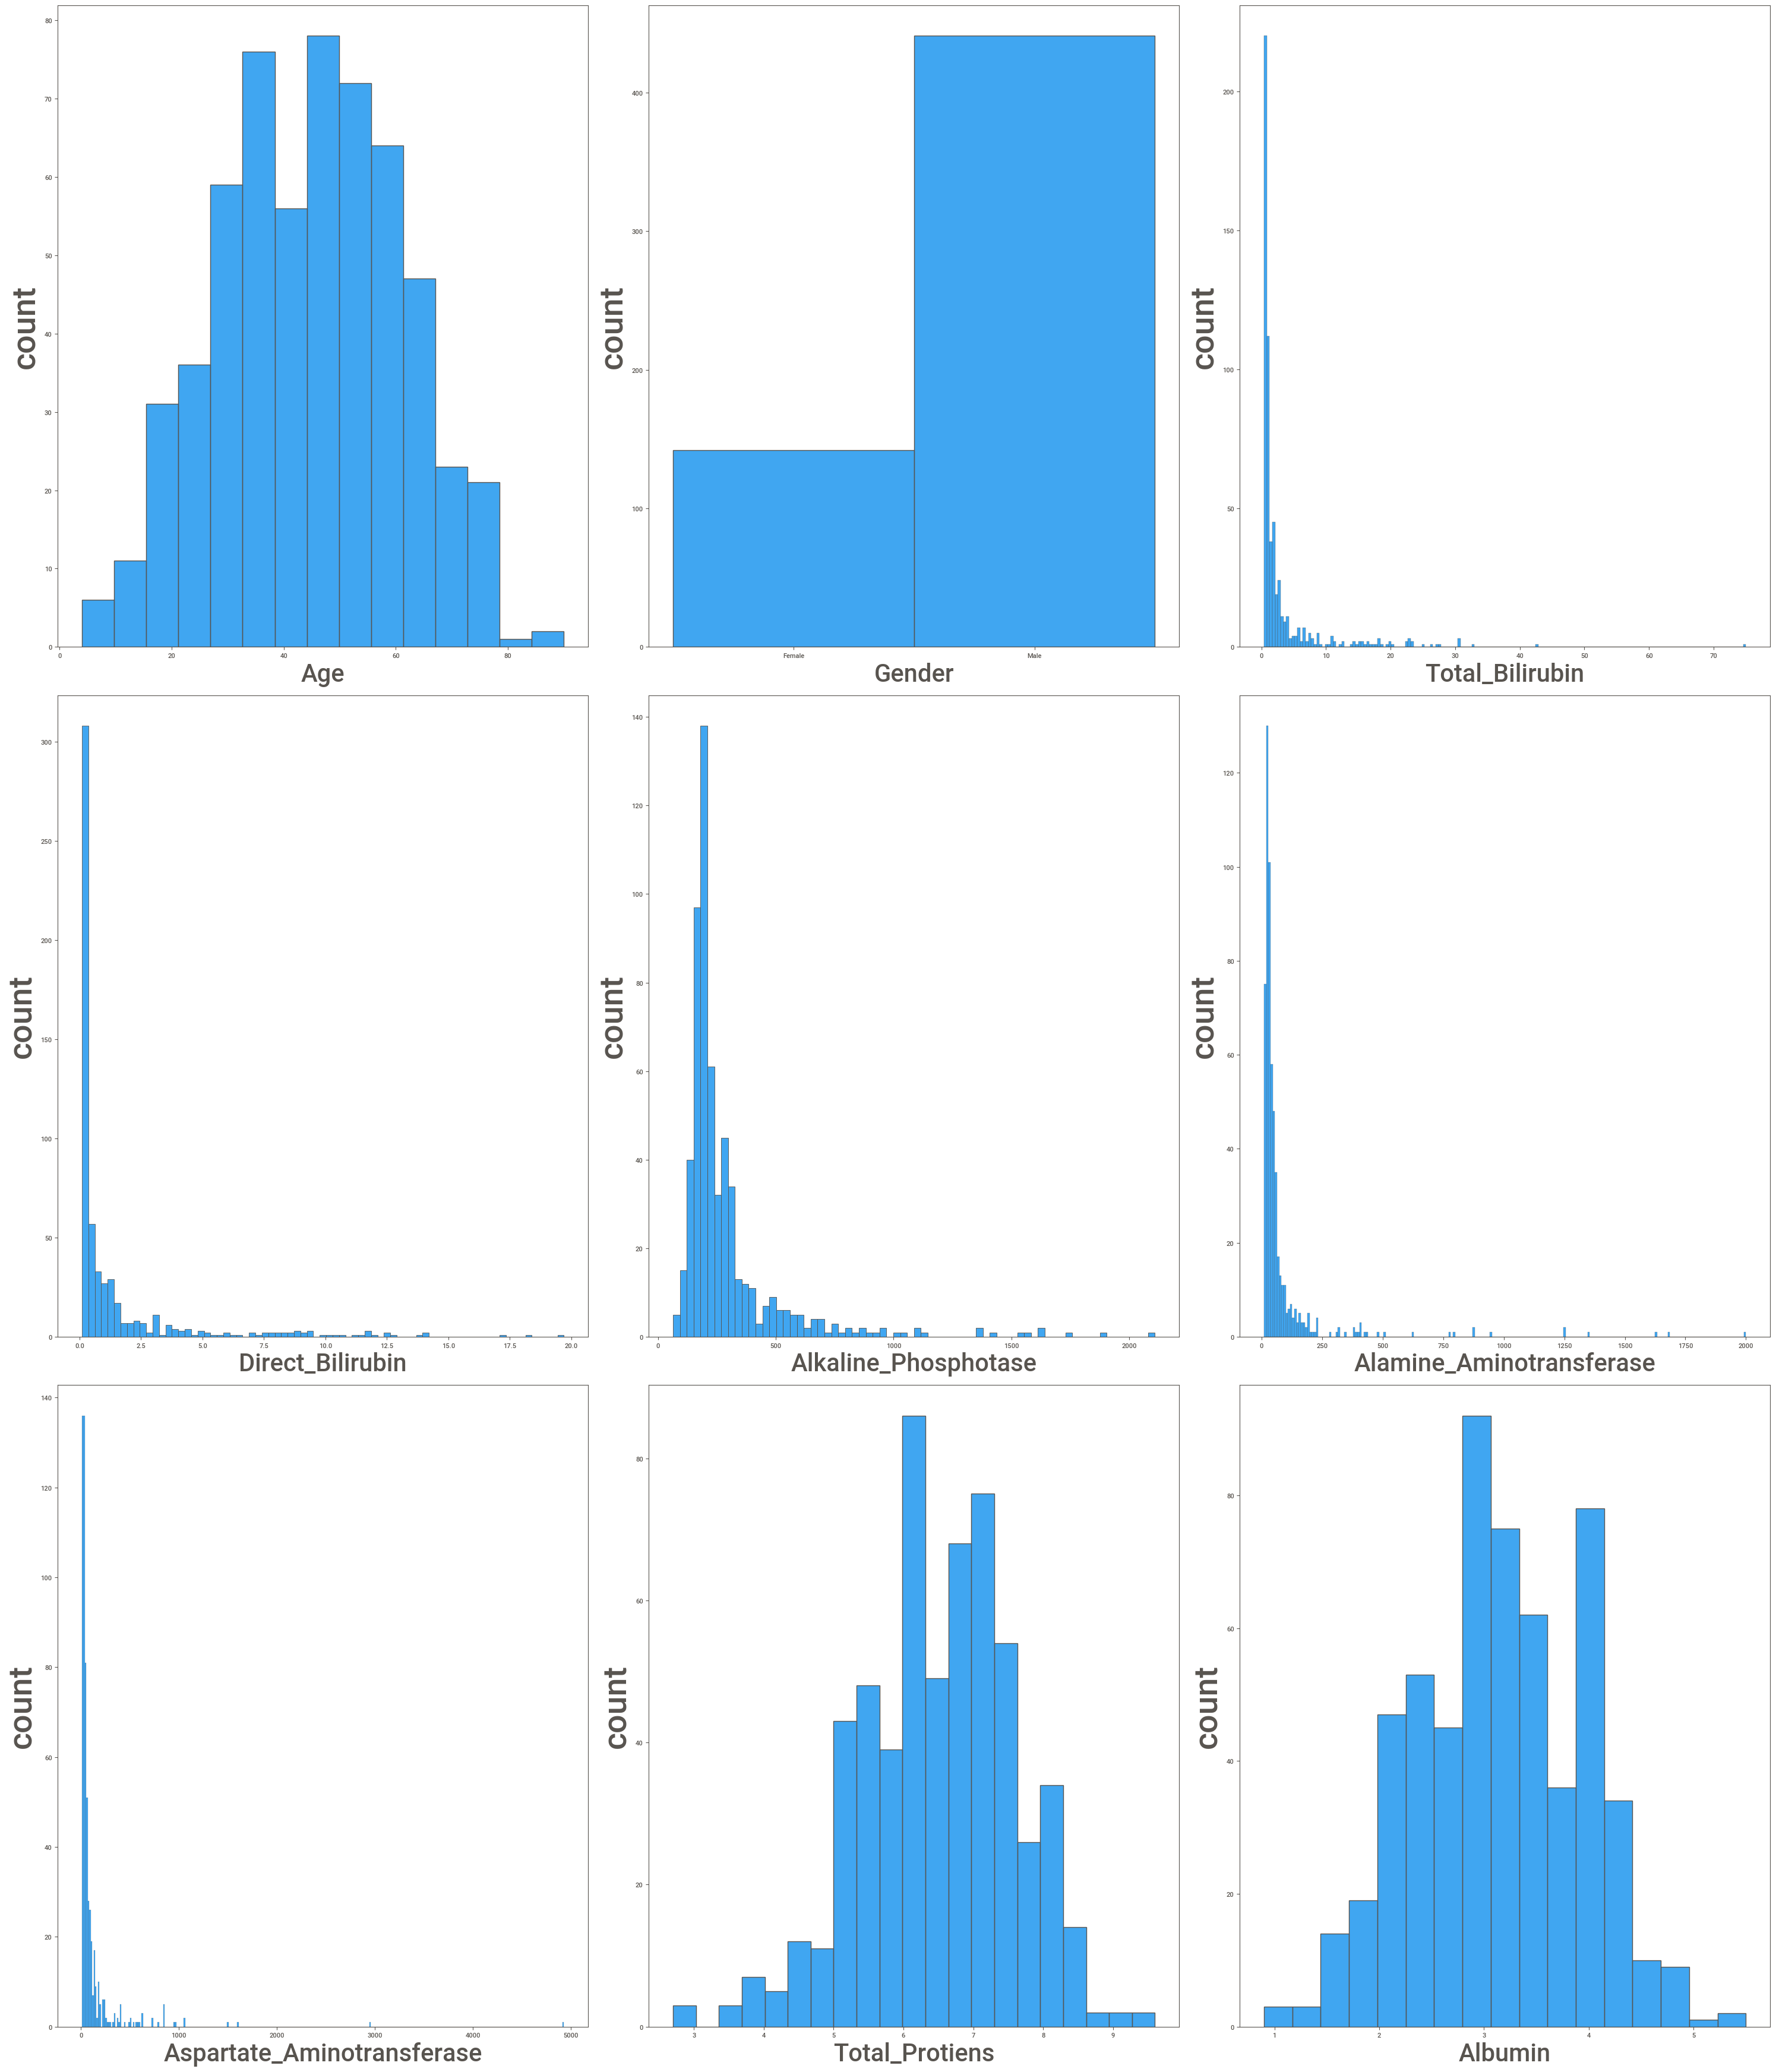

In [17]:
# Univariate Analysis
plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=30)
        plt.ylabel('count',fontsize=40)
    plotnumber+=1
plt.tight_layout()

# Univariet Insights
* **Age:-** most of the people older 30 To 60 year
* **Gender:-** male are more than female 
* **Total_Bilirubin:-** is having between 1 To 10 it is the measuring of liver disease detecting
* **Direct_Bilirubin:-** is having between 0 To 3 
* **Alkaline_Phosphotase:-** is having between 50 To 550
* **Alamine_Aminotransferase:-** is having between 0 to 250
* **Aspartate_Aminotransferase:-** is having between 0 To 300 
* **Total_Protiens:-** is having between 4.5 To 8.5
* **Albumin:-** is havoing between 1.5 To 4.5
* **Albumin_and_Globulin_Ratio:-** is having between 0.40 To 1.50
* **Target:-** 75% of people having liver desease and remainig 25% not having liver disease 


In [18]:
#Bivariet Analysis
target = df.Target

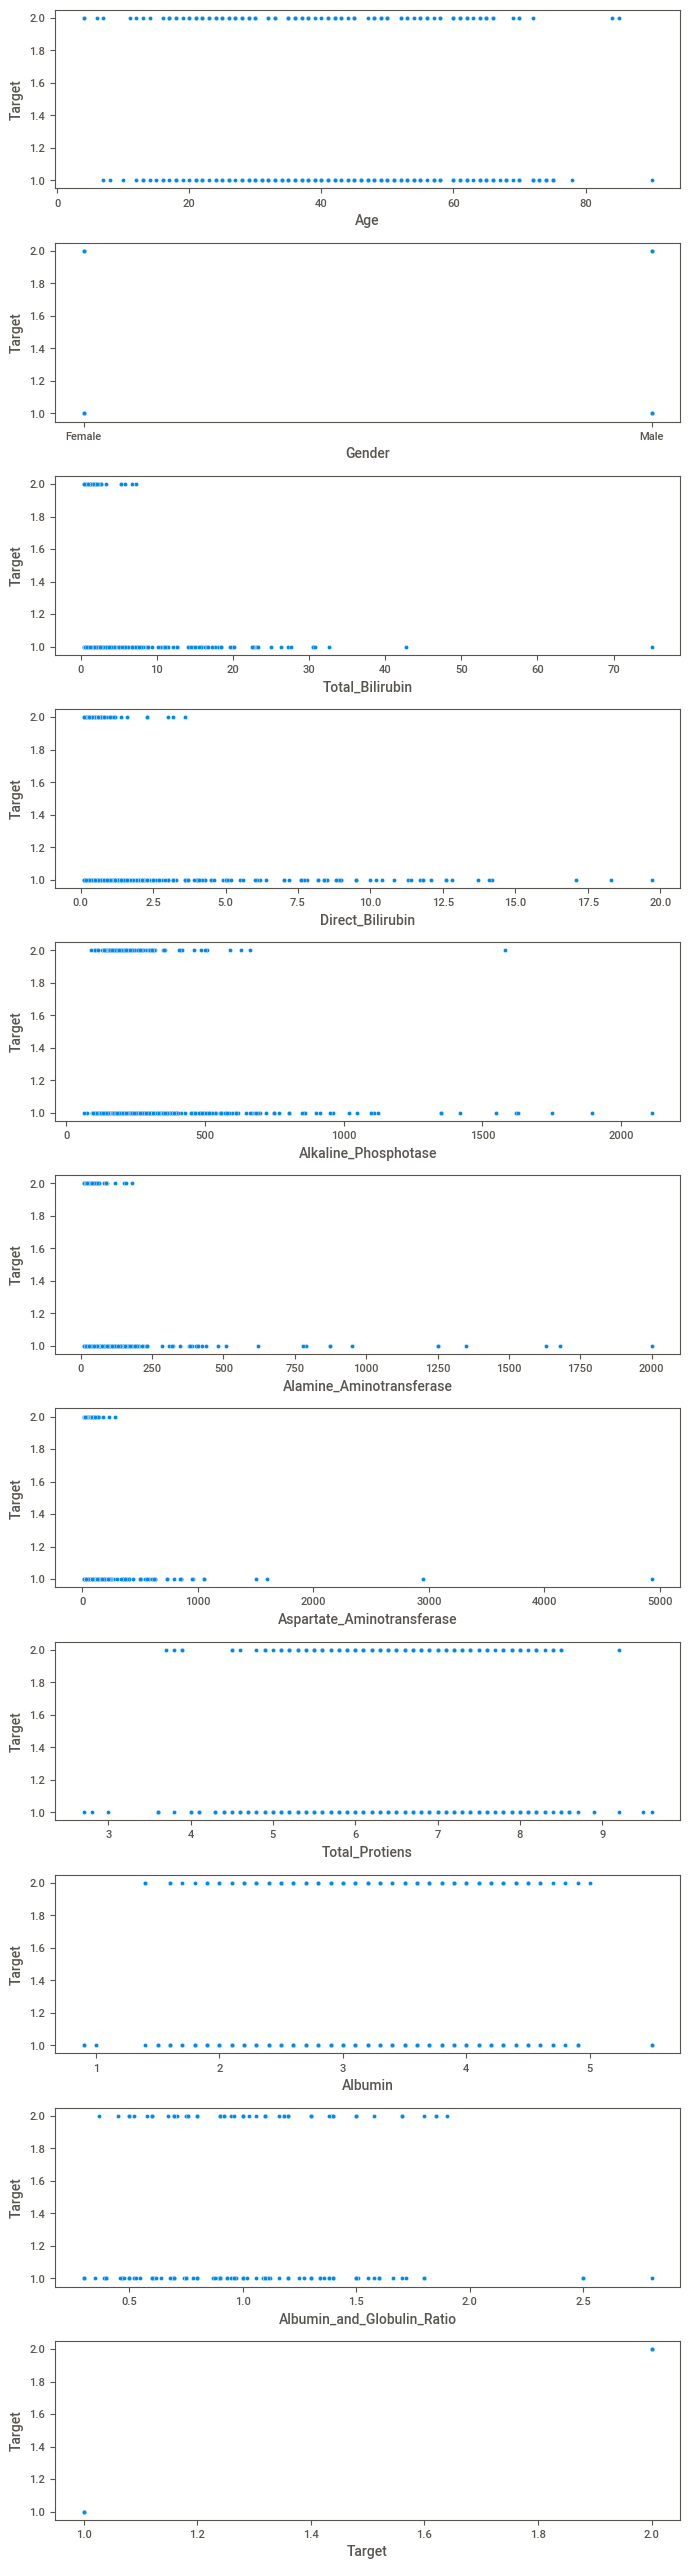

In [19]:
#Bivariet Analysis
plt.figure(figsize=(7,100),facecolor='white')
plotnumber=1

for column in df:
  if plotnumber<=43:
    ax=plt.subplot(43,1,plotnumber)
    sns.scatterplot(data=df,x=column,y=target)
    plt.xlabel(column,fontsize=10)
    plt.ylabel("Target",fontsize=10)
  plotnumber+=1
plt.tight_layout()

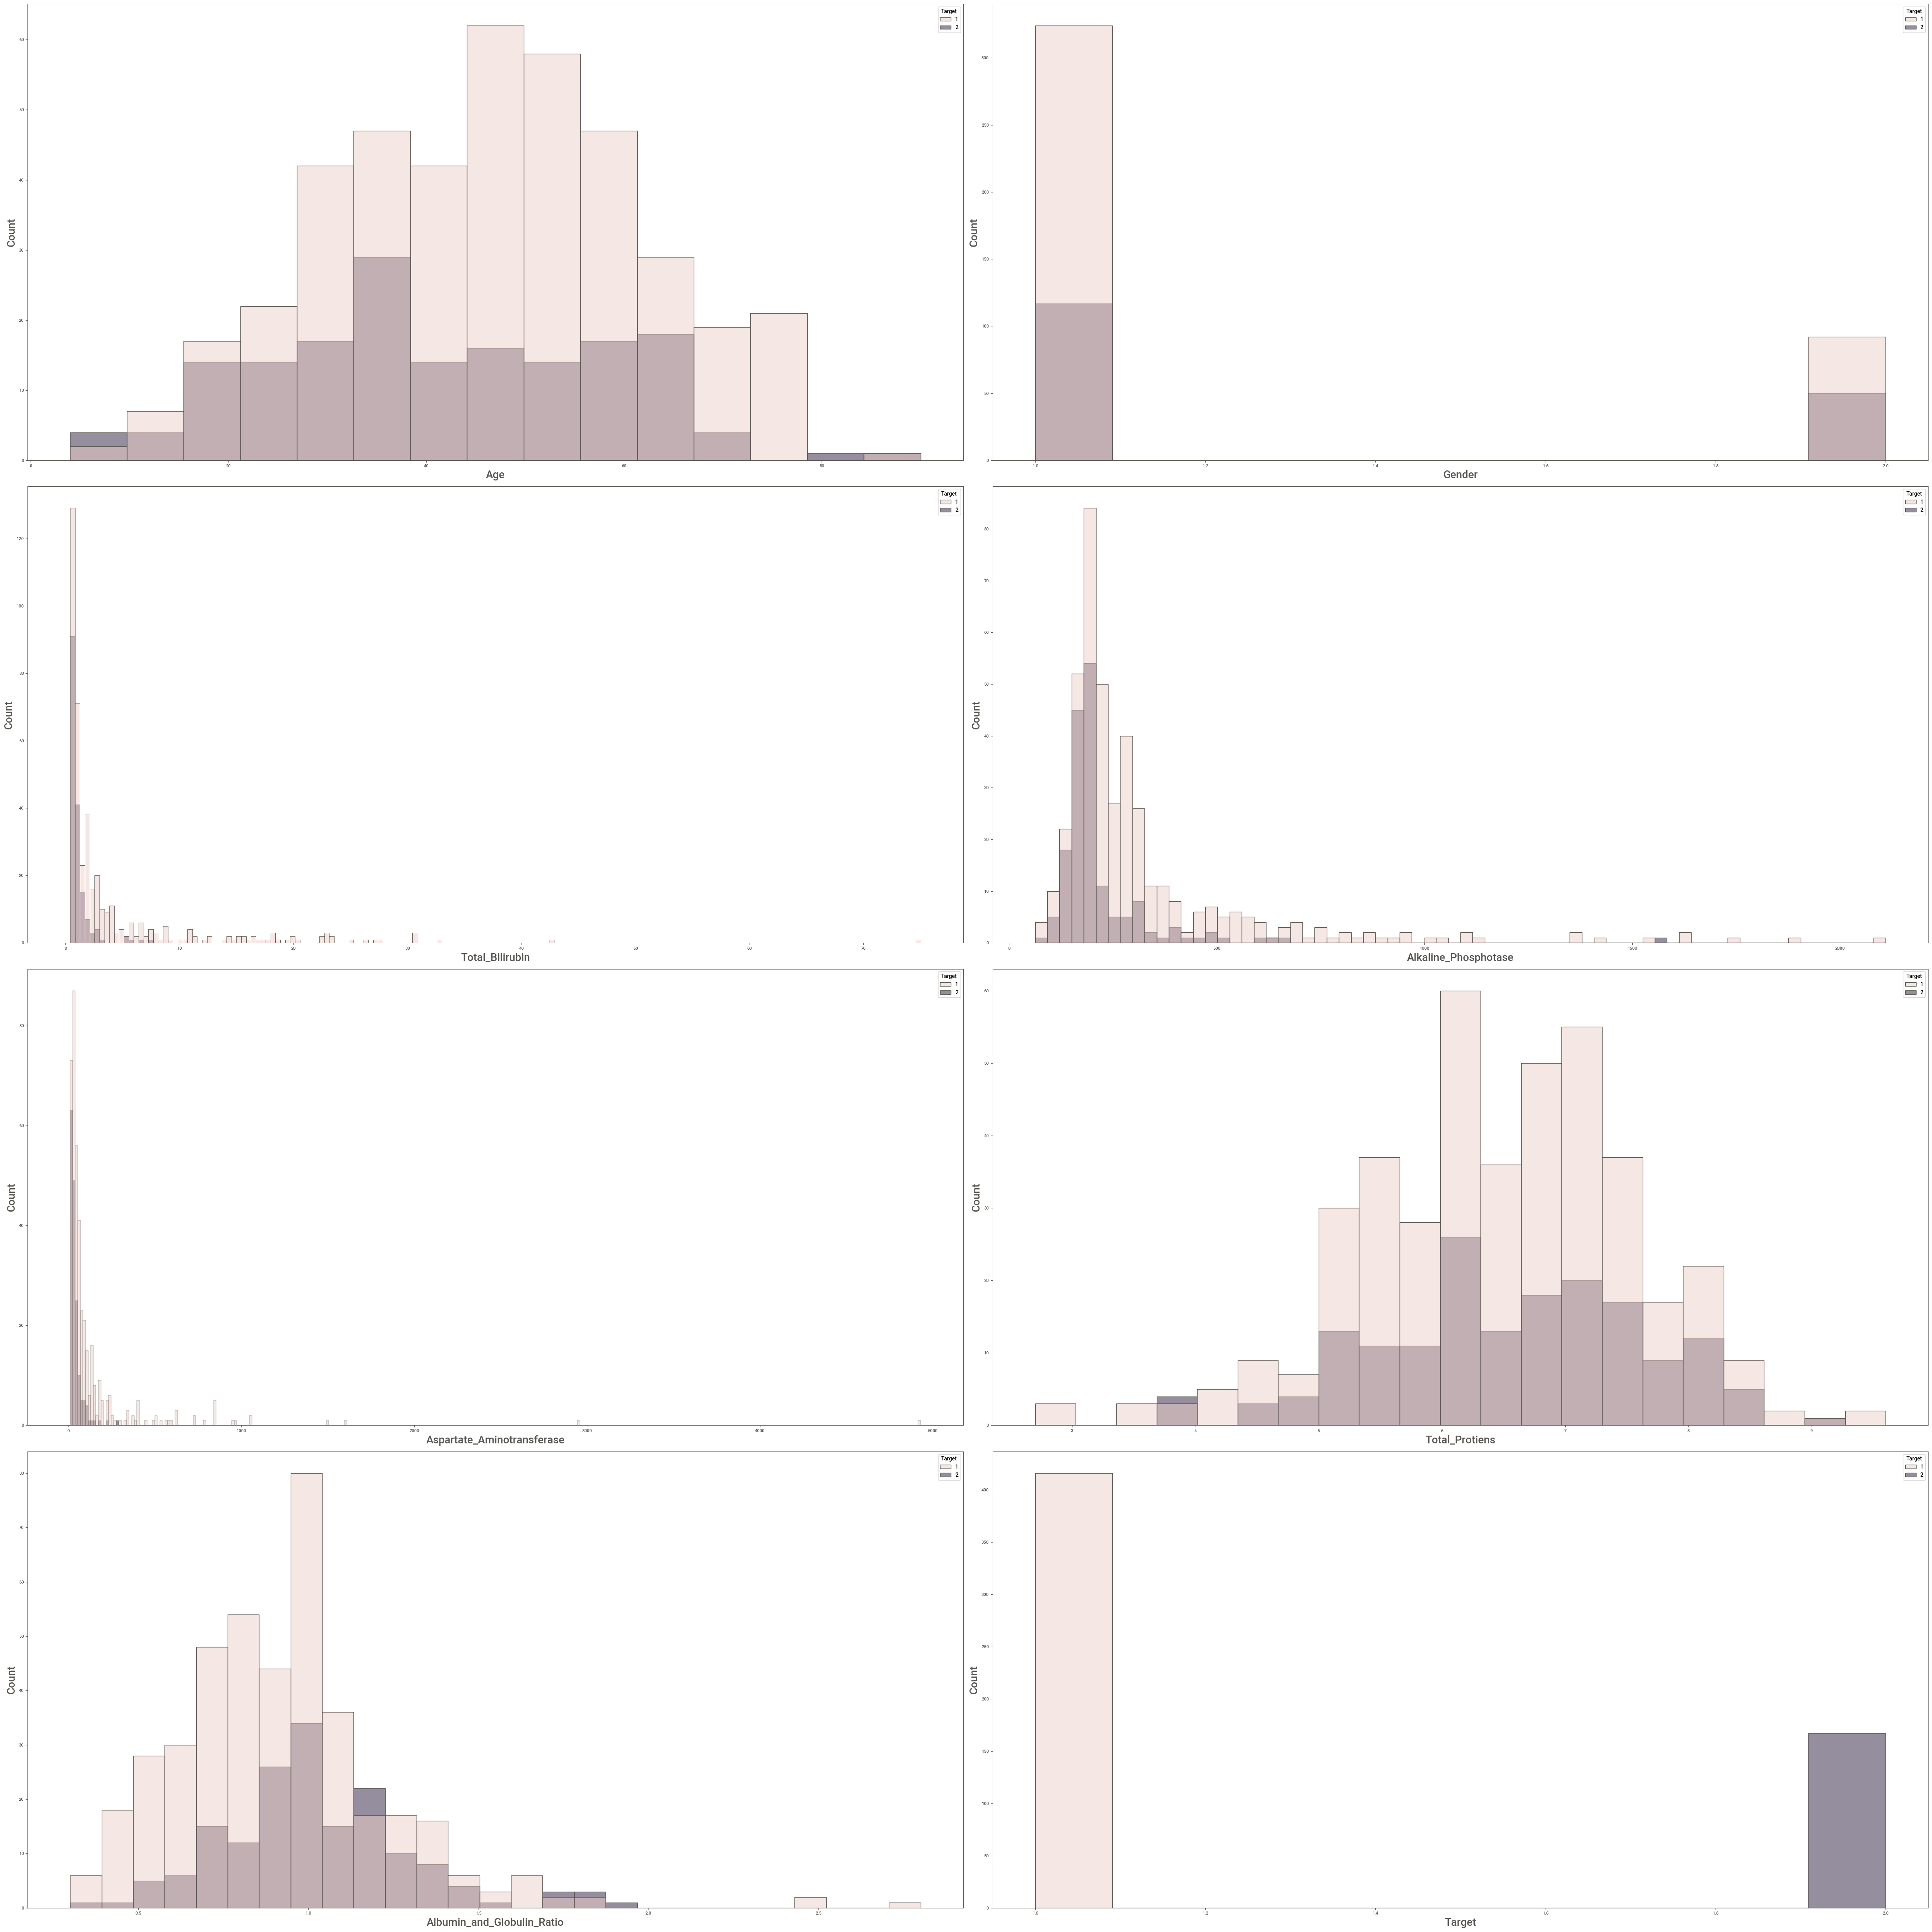

In [39]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in df:#for loop to acess columns form data1
    if plotnumber<=8 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(4,2,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=df[column].dropna(axis=0)#plotting count plot 
                        ,hue=df.Target)
        plt.xlabel(column,fontsize=20)#assigning name to x-axis and increasing it's font 
        plt.ylabel('Count',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter
plt.tight_layout()

([<matplotlib.axis.XTick at 0x17bc79ba2b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

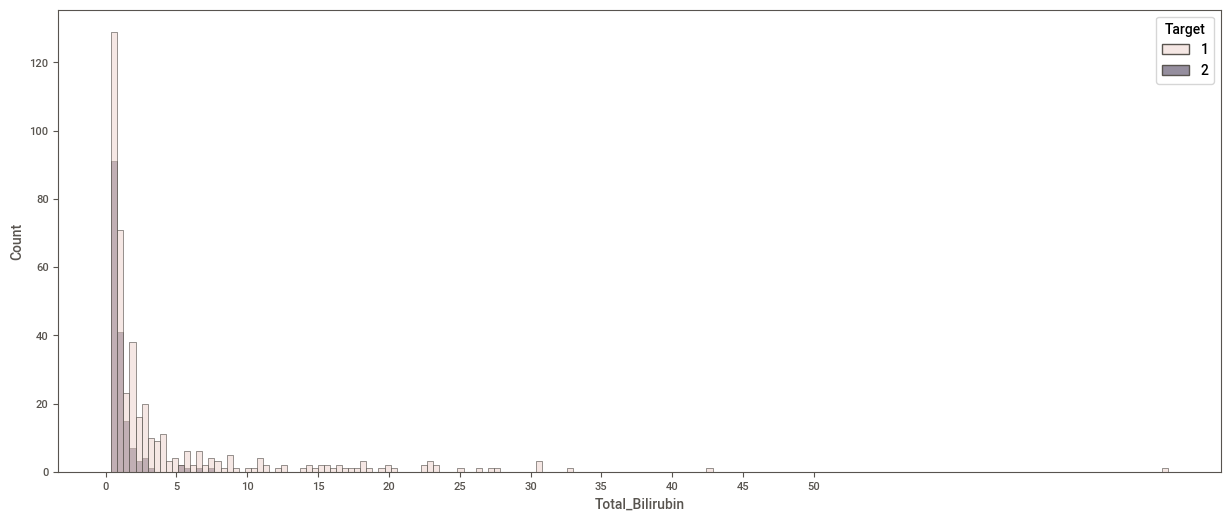

In [21]:
## Relationship between Total_Bilirubin and liver disease
plt.figure(figsize=(15, 6))
sns.histplot(x='Total_Bilirubin'
             ,hue='Target',data=df)
plt.xticks([0, 5, 10, 15, 20, 25,30,35,40,45,50]) 

([<matplotlib.axis.XTick at 0x17bd2daeb80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

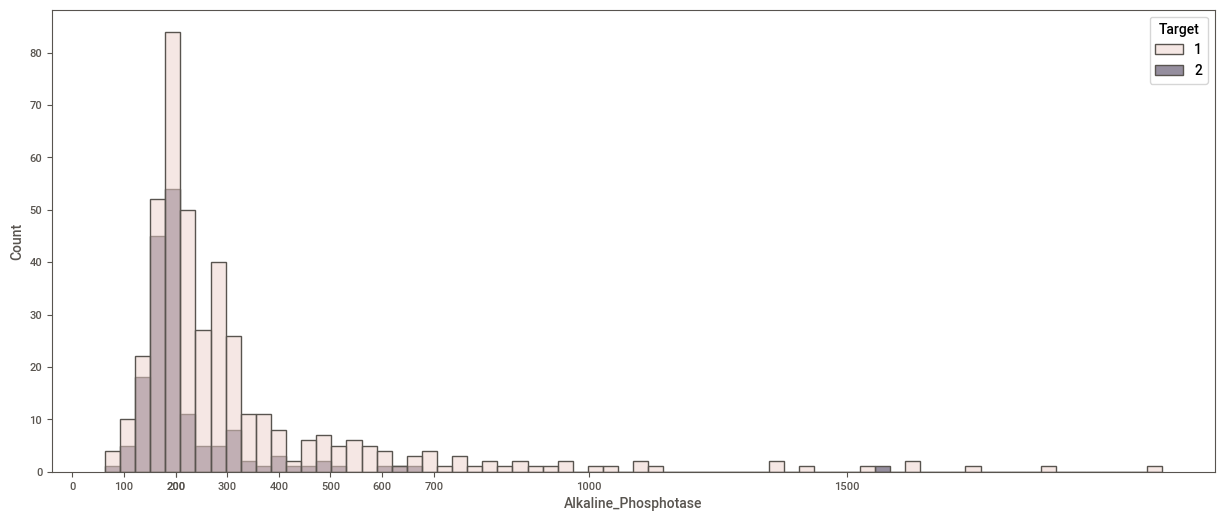

In [22]:
 #Relationship between Alkaline_Phosphotase and liver disease
plt.figure(figsize=(15, 6))
sns.histplot(x='Alkaline_Phosphotase',hue='Target',data=df)
plt.xticks([0,  100,200,300,400,500,600,700,1000,1500,200]) 

([<matplotlib.axis.XTick at 0x17bd03a0610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

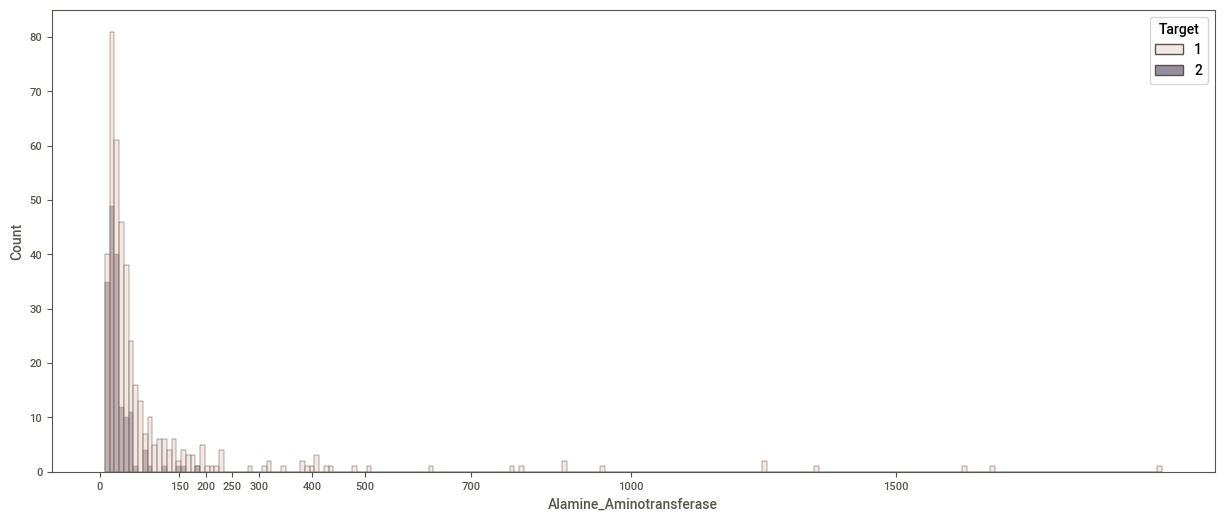

In [23]:
 #Relationship between Alamine_Aminotransferase and liver disease
plt.figure(figsize=(15, 6))
sns.histplot(x='Alamine_Aminotransferase',hue='Target',data=df)
plt.xticks([0,  150, 250,300,400,500,700,1000,1500,200]) 

([<matplotlib.axis.XTick at 0x17bca52cc10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

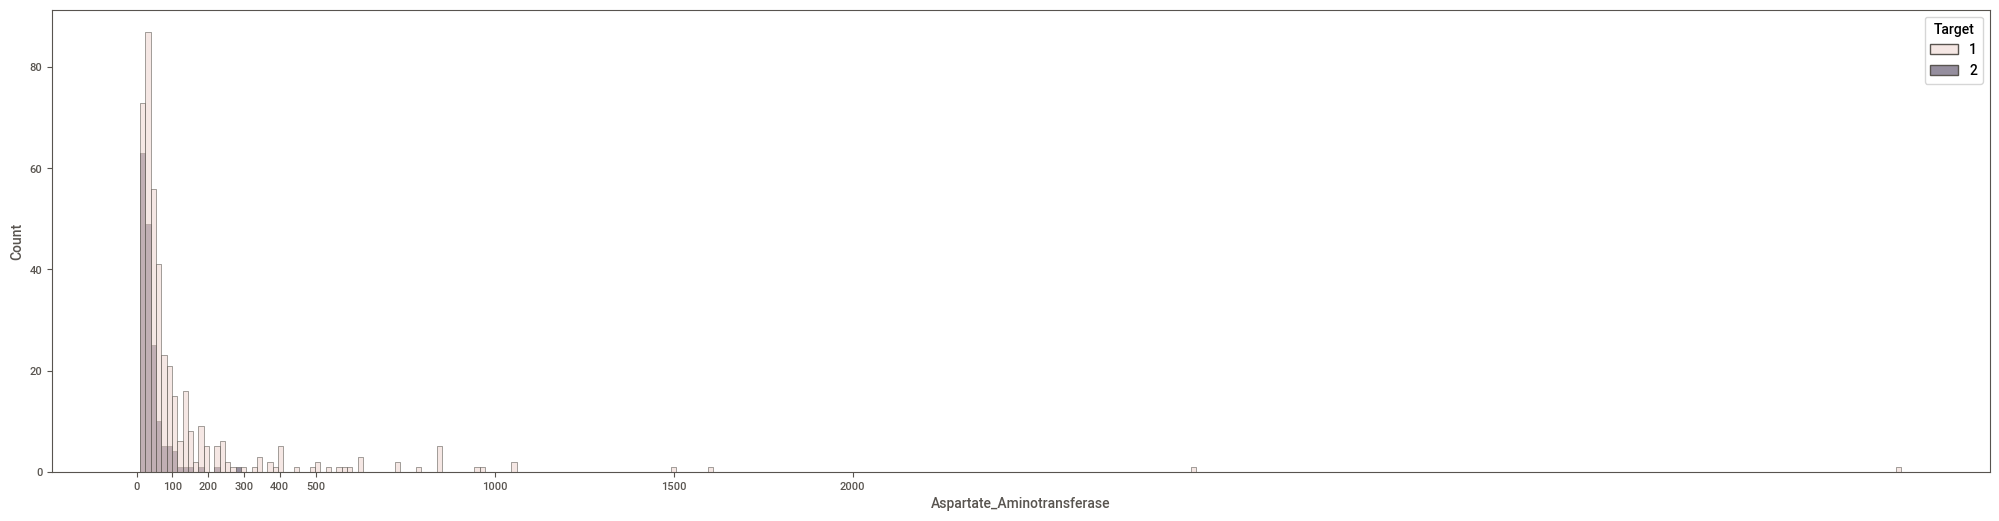

In [24]:
#Relationship between Aspartate_Aminotransferase and liver disease
plt.figure(figsize=(25, 6))
sns.histplot(x='Aspartate_Aminotransferase',hue='Target',data=df)
plt.xticks([0, 100, 200, 300, 400, 500,1000,1500,2000]) 

#Bivariet Insights
* in Age most of the people below 30 age they don't have liver disease(below 30% peoples) 
* most of the men having liver disease as compared to female
* most of the people high level of Total_Bilirubin it causes the liver disease, below 3  mg/dL is low chance to having liver disease
* Direct_Bilirubin in this 0.5 to 2 between this range low chance to having liver disease 
* Alkaline_Phosphotase in this 100 to 220 between this range low chance to having liver disease
* Alamine_Aminotransferase in this
* Aspartate_Aminotransferase in this 10 to 50 between this range low chance to having liver disease
* Above 400 people having liver disease below 180 people don't have liver disease

# Data Preprocessing

In [25]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [26]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'] .fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [27]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

In [28]:
num=1
for i in df:
    print(num,i,df[i].unique())
    num+=1

1 Age [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
2 Gender ['Female' 'Male']
3 Total_Bilirubin [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
4 Direct_Bilirubin [ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  

# categorical data converting numerical

In [29]:
df.Gender=df.Gender.map({'Male':1, 'Female':2})

In [30]:
df.head()#checking converted or not

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# FEATURE ENGINEERING

<AxesSubplot:>

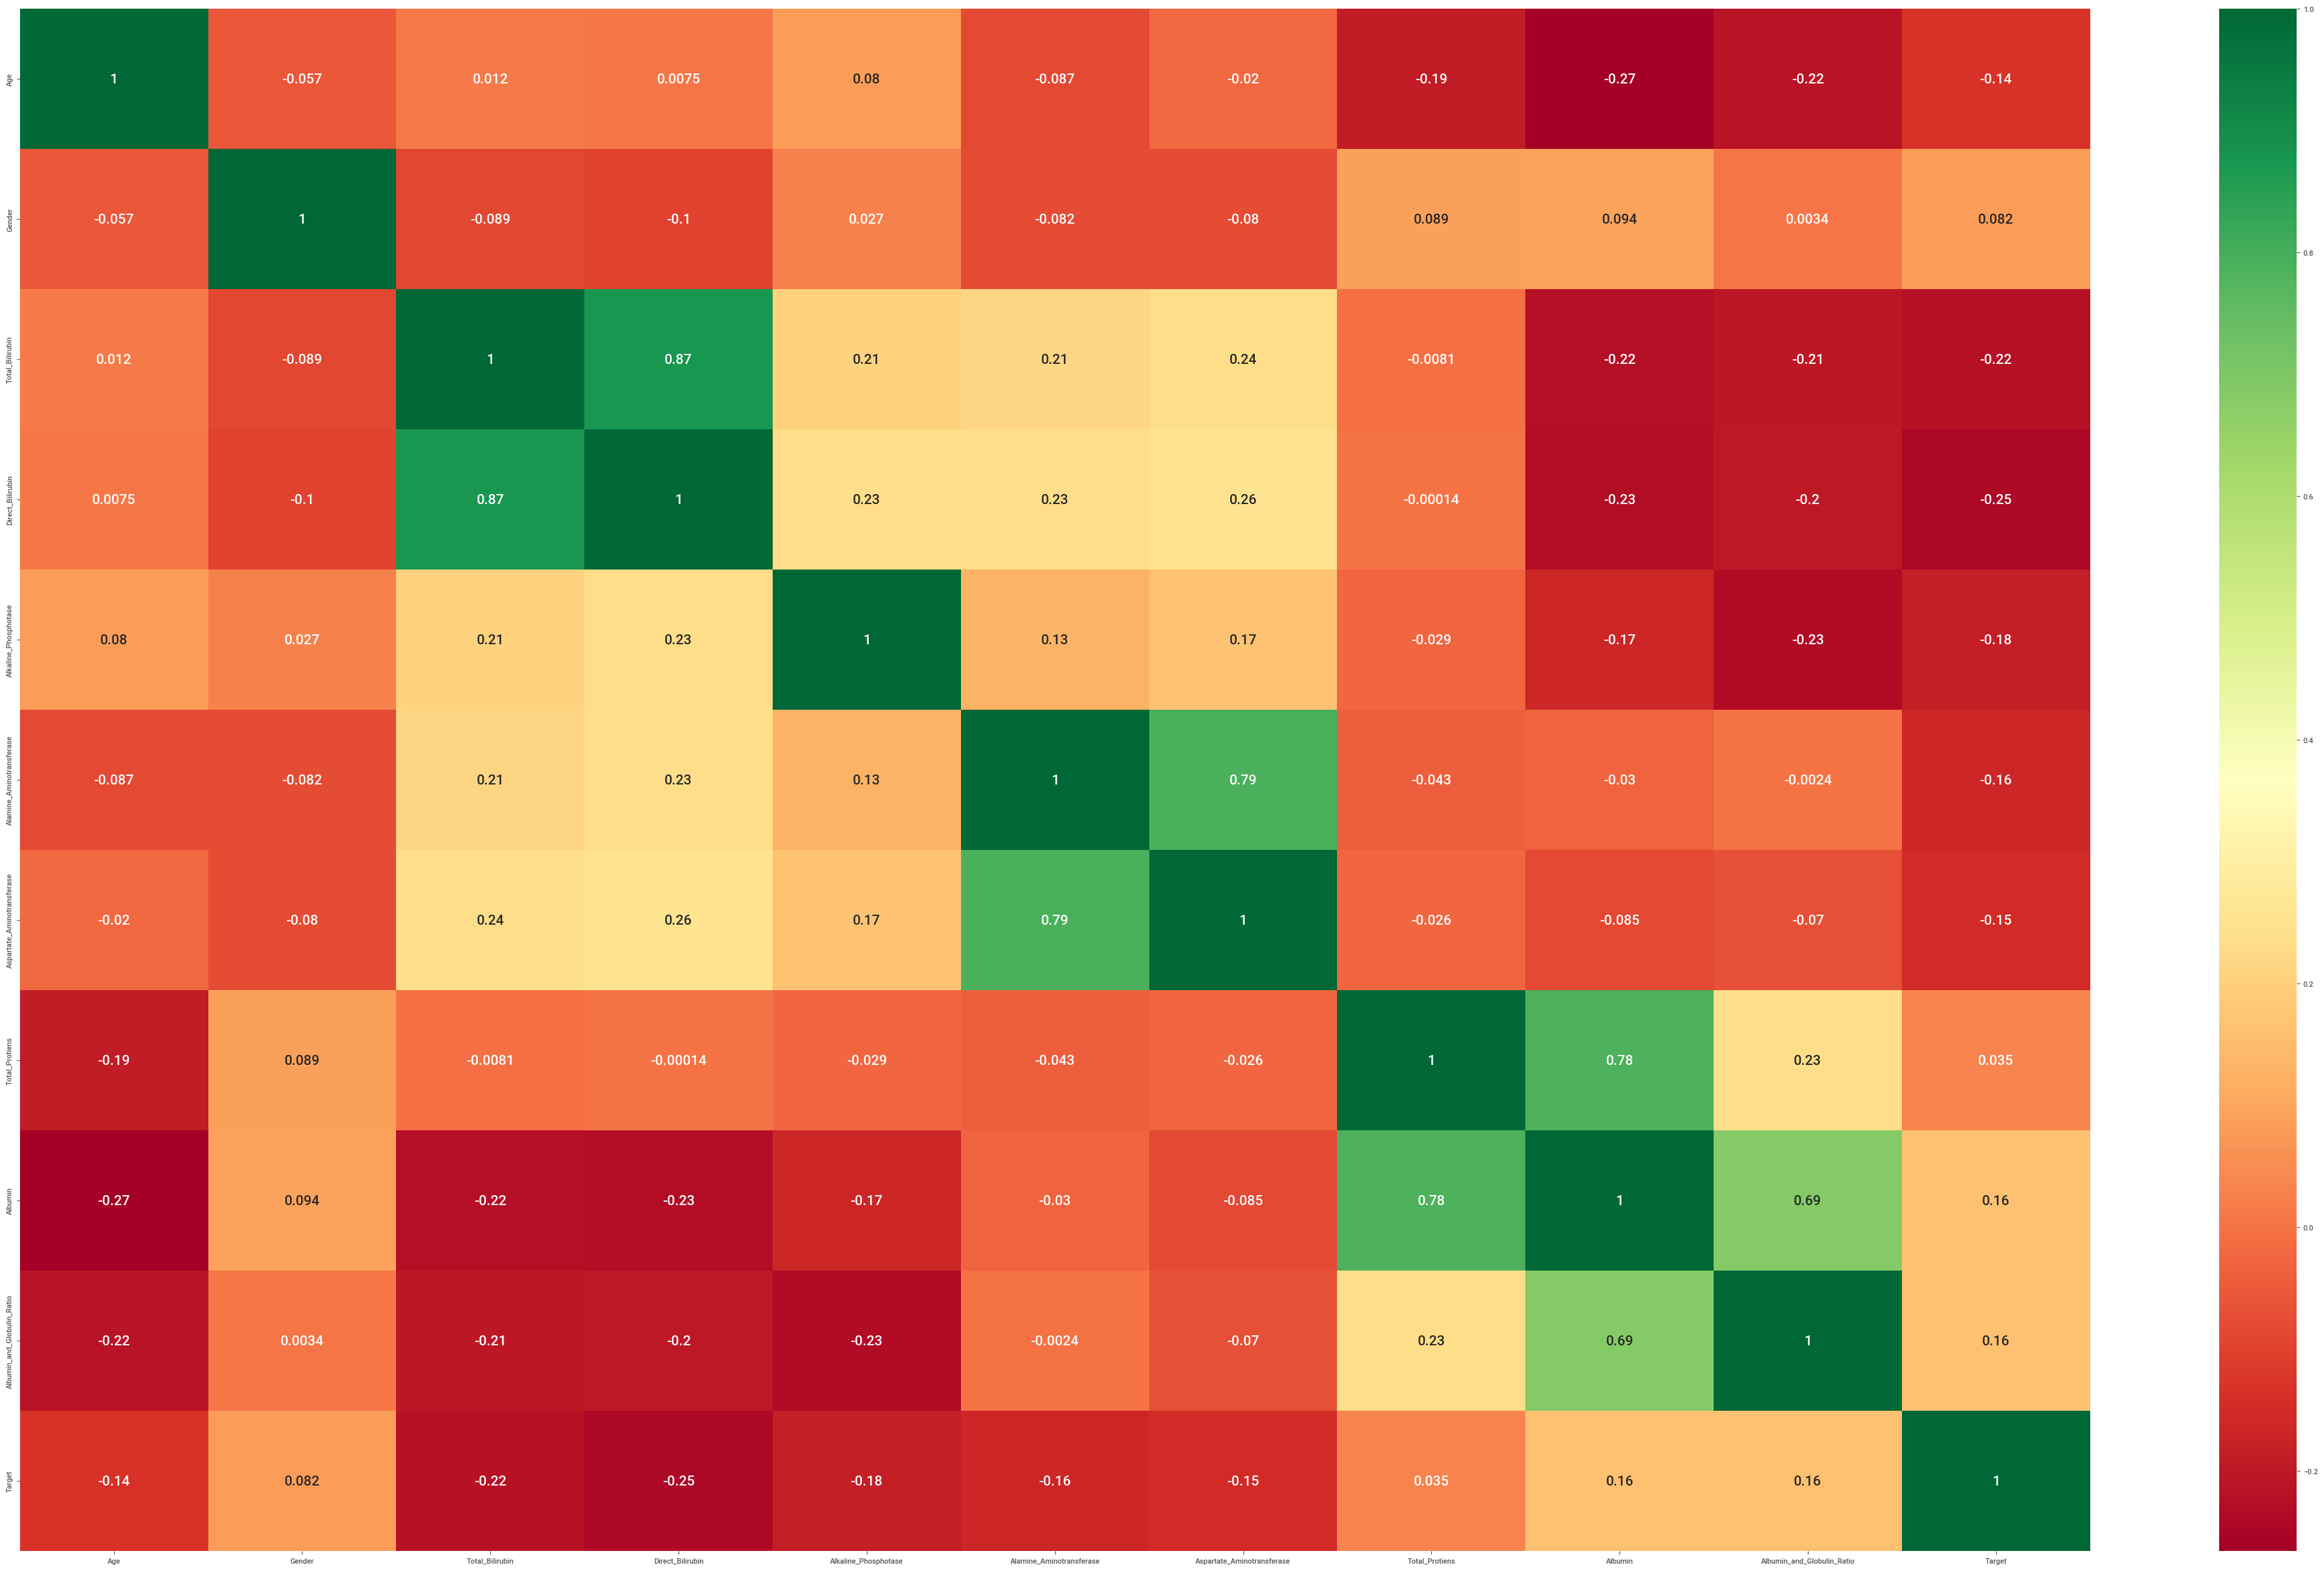

In [31]:
# checking the correlation in numerical columns
plt.figure(figsize=(50, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [32]:
# Drop high correlated columns
df.drop(['Direct_Bilirubin','Alamine_Aminotransferase','Albumin'],axis= 1,inplace = True)

# MODEL CREATION

In [33]:
X = df.iloc[:,:-1]
y = df.Target

In [34]:
X

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,65,2,0.7,187,18,6.8,0.90
1,62,1,10.9,699,100,7.5,0.74
2,62,1,7.3,490,68,7.0,0.89
3,58,1,1.0,182,20,6.8,1.00
4,72,1,3.9,195,59,7.3,0.40
...,...,...,...,...,...,...,...
578,60,1,0.5,500,34,5.9,0.37
579,40,1,0.6,98,31,6.0,1.10
580,52,1,0.8,245,49,6.4,1.00
581,31,1,1.3,184,32,6.8,1.00


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Target, Length: 583, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Print model accuracies
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)
print("SVM Classifier Accuracy:", svm_accuracy)
print("K-Nearest Neighbors (KNN) Classifier Accuracy:", knn_accuracy)

# Print classification reports for each model
print("\nRandom Forest Classifier Report:\n", classification_report(y_test, rf_pred))
print("\nGradient Boosting Classifier Report:\n", classification_report(y_test, gb_pred))
print("\nSVM Classifier Report:\n", classification_report(y_test, svm_pred))
print("\nK-Nearest Neighbors (KNN) Classifier Report:\n", classification_report(y_test, knn_pred))


Random Forest Classifier Accuracy: 0.7942857142857143
Gradient Boosting Classifier Accuracy: 0.7085714285714285
SVM Classifier Accuracy: 0.7314285714285714
K-Nearest Neighbors (KNN) Classifier Accuracy: 0.6685714285714286

Random Forest Classifier Report:
               precision    recall  f1-score   support

           1       0.82      0.93      0.87       128
           2       0.69      0.43      0.53        47

    accuracy                           0.79       175
   macro avg       0.75      0.68      0.70       175
weighted avg       0.78      0.79      0.78       175


Gradient Boosting Classifier Report:
               precision    recall  f1-score   support

           1       0.78      0.84      0.81       128
           2       0.44      0.34      0.39        47

    accuracy                           0.71       175
   macro avg       0.61      0.59      0.60       175
weighted avg       0.69      0.71      0.70       175


SVM Classifier Report:
               precision  

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.73
Confusion Matrix:
 [[123   5]
 [ 43   4]]
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.96      0.84       128
           2       0.44      0.09      0.14        47

    accuracy                           0.73       175
   macro avg       0.59      0.52      0.49       175
weighted avg       0.66      0.73      0.65       175



# I would highly recommend the best model for production for the Liver disease prediction dataset is Random Forest here we consider f1 score beacuse this dataset is detection of disease here we got high f1 score and also got high accuracy as compared to other models